In [2]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy  as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error,r2_score, adjusted_rand_score

df= pd.read_csv('data/height-weight.csv')
df.info()
df.describe()
df.head()


# filter out independent and dependent variable
x=df['Weight']
y=df['Height']


# test train data




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


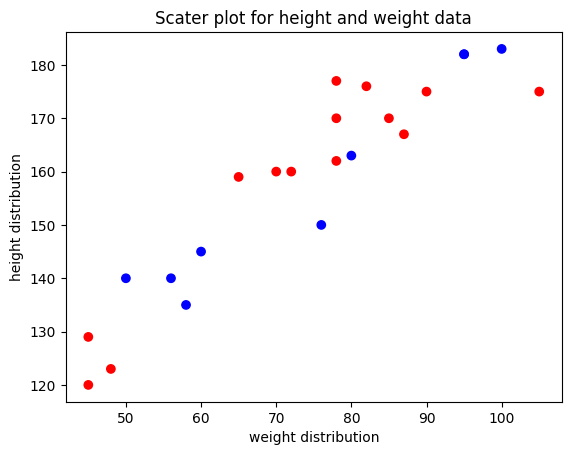

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_3490/3877974643.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df['Weight'], y=df['Height'], data=df, palette="viridis", legend=True)


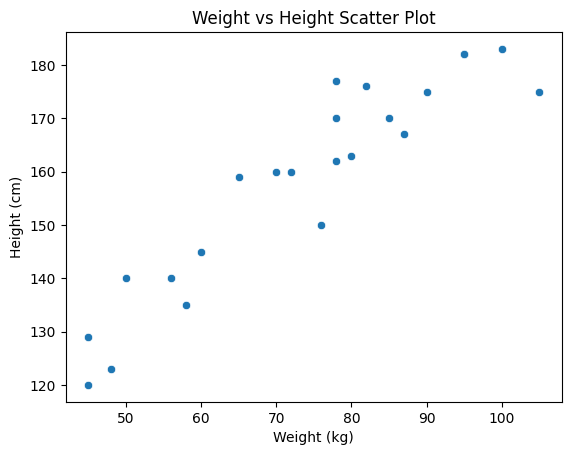

In [3]:

#Scatter plot is a graphical representation that shows the relationship between two continuous numerical variables using dots on a 2D plane.
#Identify Patterns :- Linear relationship, Non-linear relationship, Clusters
#In Machine Learning We use scatter plots to:-, Visualize data distribution, See class separation (using color),Understand feature relationships

#check type of data (linear or non linear) using scatter plot
#we can colors(no of value = same no of colors)
group = ['red','blue','red','blue','red','red','blue','red','blue','red','red','blue','red','blue','red','red','blue','red','blue','red','red','blue','red']
plt.scatter(x=df['Weight'] , y=df['Height'], c=group)
plt.title('Scater plot for height and weight data')
plt.xlabel('weight distribution')
plt.ylabel('height distribution')
plt.show()

#OR

#Seaborn is built on top of Matplotlib and provides better default styling and easier statistical visualization like adding color using hue.”
# hue= Adds a sperate colur for column , other than x, y. we can show 3 inputs in 2d graph so if pass cilum in hue="Gender", this will aply color for gender column to distinguish from x,y.
#hue_order=  order in which we want to show 
#size= Adds Bubble Size (if we have multiple input , 2 can show using x,y them for 3rd we can increase size of bubles)
#style= Changes Marker Shape( same for 4th  we can make style like cross, dots etc.)
#palette= for custom colors
#legend=True → shows box explaining which color is A or B. it will work if have more than 2 category.(legend only works automatically if you have hue, style, or size.)
#palette={"Weight": "blue", "Height": "pink"}

sns.scatterplot(x=df['Weight'], y=df['Height'], data=df, palette="viridis", legend=True)
# Add title and labels
plt.title("Weight vs Height Scatter Plot")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.show()

In [4]:
# check correaltion: "how strong is their friendship, standardized so we can compare any two pairs"
#it range between -1 and 1
#Why it’s useful:--
#To see relationships between features in a dataset.
#Helps in feature selection: highly correlated features may be redundant.
#Often used in exploratory data analysis (EDA).

#Value range: -1 to 1
#1 → perfect positive correlation
#-1 → perfect negative correlation
#0 → no linear correlation

#It can be a problem:-
#Multicollinearity(if 2,3 feature are highly corelated.) in models:
#In models like linear regression, highly correlated features can cause unstable coefficients.
#Small changes in data → big changes in the model weights → hard to interpret.

#Redundant information:
#Two features giving the same info don’t add value.
#Can slow down training and increase memory usage.


#When it’s okay
#Some models don’t care about correlation, like:
#Decision Trees
#Random Forests
#radient Boosting
#These models will naturally pick the best feature when building splits.

#Rule of Thumb
#Linear models / regression: consider dropping or combining highly correlated features.S
#Tree-based models: you can usually keep them, though removing redundant features can slightly improve efficiency.

#Impt: is always between -1 and 1, no matter what units X and Y are in.

df.corr() #


,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [5]:

#cov():- It tells you how two numbers move together:
#Positive covariance → X and Y increase together
#Negative covariance → When X increases, Y decreases
#Close to 0 → little linear relationship#

#2. How cov() helps in feature selection
# Identify linear relationships:-
#If two features have very high positive or negative covariance, they are probably redundant.#
#Example: height_cm and height_inches → very high covariance → you can drop one.

#Understand data scale:-
#Covariance helps you see which features vary a lot together.
#Features with very small covariance with all others → may be less useful.

#It can be: any positive number, any negative number, or zero.
#Its value depends on:
#The scale/units of the variables.
#How spread out the values are.

#Use corr() to compare relationships on the same scale, especially if features have different units.


#Positive covariance means:- 
#Two features increase together.
#Example:
#height_cm and height_inches → positive covariance
#sales and advertising_budget → positive covariance

#What it implies:-
#These features are related / redundant.
#In linear models, having both can cause multicollinearity → unstable model coefficients.
#In tree-based models, it’s usually okay, because the model can pick the more important one.

df.cov()

,Weight,Height
Weight,319.422925,324.707510
Height,324.707510,380.703557


In [6]:
# sperate independent variable and depndent variable
x= df[['Weight']] #  It should have dataframe df[['weight']] using 2 bracket or 2D array  like(23, 1)
y= df['Height'] ## 1D array or series because it is have only one value.(23,)
# split train and test data 
# (Note:-  it should be in same order when you split X_train, X_test, y_train, y_test, otherwise it will give error)
#test_size=  20% data will be test data . it will pick 20% random data and will put in  X_test
X_train, X_test, y_train, y_test = train_test_split( x,y, test_size=0.2, random_state=2 )

X_train , X_train
print(x.shape)  # (23,1)
print(y.shape)



(23, 1)
(23,)


In [7]:
#apply standarisatiom
# we need to Puts all features on the same scale(same unit ), regardless of original units.
#Models sensitive to scale, These use distances or gradients, so features with large scales dominate learning.
#Gradient descent works more efficiently when features are on a similar scale.
#If one feature is in thousands and another in 0–1 range, the bigger one will dominate, which is usually undesirable.

#eg:-
#Imagine you’re comparing height in cm and weight in kg in a formula. 
# Without standardization: height dominates because numbers are bigger. Standardization makes them comparable.

# standarisation always applied on train data
#fit -> fit will calculate  #Calculates the parameters needed for scaling: mean and standard deviation of the training data.
#transform:- Uses the learned mean and std to actually scale the data. it will put value in Zscore formula Zscore​=X−Xˉ​/σ and scale values
#fit is use only for train data not for test data.
#test data:- for test data we use only transform(we just applied formula will use mean and standard value of train data.)

#Tree-based models (Decision Trees, Random Forest, Gradient Boosting)
#They split based on feature values, not distances → standardization not required.

#Data leakage:-
# Scaling before split leaks info from test set
#Why it’s bad: The model looks good during training but fails on real-world data.

#Why:

#If you scale before splitting, the scaler uses information from the entire dataset, including the test set.
#This causes data leakage because the test set “influences” the training process.
#Scaling after splitting ensures the model only sees training data statistics during trainin#. not see test data. so we test model using test data.

scalar =StandardScaler()
X_train= scalar.fit_transform(X_train)
X_test = scalar.transform(X_test) #use only transfom , not fit for test data.
X_train , X_test

(array([[-1.67488501],
        [-1.05583101],
        [ 1.72991204],
        [ 0.05846621],
        [-0.436777  ],
        [ 0.30608782],
        [ 0.05846621],
        [-0.746304  ],
        [-1.17964181],
        [-1.79869582],
        [ 0.80133102],
        [ 0.61561482],
        [-0.06534459],
        [ 1.11085803],
        [-0.31296619],
        [ 1.42038503],
        [ 0.05846621],
        [ 1.11085803]]),
 array([[-1.98441202],
        [-1.98441202],
        [-1.30345261],
        [ 0.18227701],
        [ 0.49180402]]))

In [8]:
# create model ( create model object)
model = LinearRegression()
model

#train model(fit, fit_transform are attribute of model object)
#fit 
model.fit(X_train, y_train)


#predict fro test

y_predict= model.predict(X_test)  

y_predict
#result -> if compair y_predict with actual output y_text, found diffrence like for 1st pridicted value:- 131.718363 and origional output:-129  
# so it is no model is not prdicting correctly. 

array([131.718363  , 131.718363  , 142.20495594, 165.08479508,
       169.85142823])

In [9]:
X_test

array([[-1.98441202],
       [-1.98441202],
       [-1.30345261],
       [ 0.18227701],
       [ 0.49180402]])

/var/folders/l5/brjnv_593qdf8cbh4v4ch0840000gn/T/ipykernel_3490/1782202324.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_train[:, 0], y=y_train, palette="viridis", legend=True)


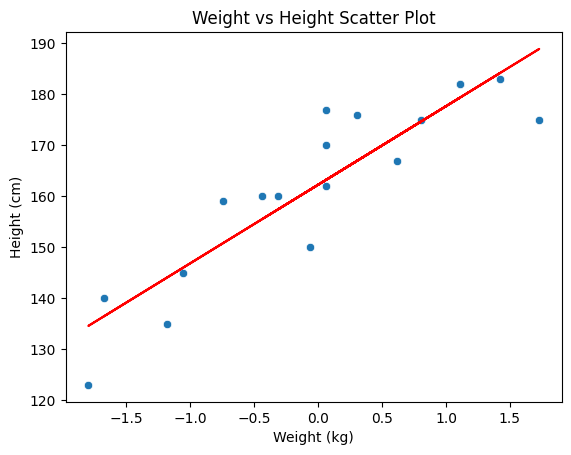

In [10]:
#check best fit line created by model.
sns.scatterplot(x=X_train[:, 0], y=y_train, palette="viridis", legend=True)
plt.plot(X_train, model.predict(X_train), color='red')  #we can also pass X_test for both. here we are checking for X_train data
plt.title("Weight vs Height Scatter Plot")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.show()

#this is best fit line created by algo by finding m, b (slop, interscept and put in line y= mx+b)

In [11]:
#check slope value and intercept value.
m = model.coef_
b= model.intercept_
m, b   #  we get slop(m)= 0.95332663,  b(interscept) = 88.81866461647641. it is calculated by keeping ∂E/∂b​= =0, ∂E​/∂m=0(we are at the global minimum of the error(at this point very less error and  find m, b  best value ) )

# in simple language m tell weightage of x varibale on  Y in equation:- y=mx+b.( if m(slope) will small , small unit change in x will be less impact on y. if m is big then y will impact more )
#m (slop) -> tell how much output(y) depend on x(input)
#b =>tell mx is zero but stll there will some value b(offset)

#M mean:- one unit movement in x-axis cause 15.39973275 move in y axis.
#intercept maen:-  when weight value(m (solpe)) is Zero , line intercept at 162.27

(array([15.39973275]), np.float64(162.27777777777777))

In [ ]:
#check performance metric how our model is performing
#MAE:-
#MAE range: 0 to ∞
# Minimum value = 0 → Perfect model (no error)
#it will never negative because of absolute.
#Robust to outlier -> less effective by outlier. Metric will impac less so it repsent model performance corectly.
#Disadvantages:-
#Not differnciable because of absolute so harder to work with gradient decent.


#mse:- 
#range: 0 to ∞
# Minimum value = 0 → Perfect model (no error)
#Why do we square errors?
#removes negative sign
#Penalizes large errors more:- if large error.it ract on it . try to reduce to adjut weights(m.b)
#Makes model focus on reducing big mistakes  
#disadvantage:-  
#it is not robust to outliers -> It is highly sensitive to extreme values.One big error can increase MSE a lot. which is not good.
#Unit Issue:- Dollars → MSE unit = Dollars², Height (cm) → MSE unit = cm² which is not good because of this Hard to Interpret.
#Since it’s squared, the number becomes large and depends heavily on scale. If your target values are large → MSE becomes very large.

#rmse:-
#range: 0 to ∞
# Minimum value = 0 → Perfect model (no error)
#Unit = same as target variable (Predicting house price in $ → RMSE = $5,000, Predicting height in cm → RMSE = 3 cm, Much easier to understand than MSE (which would be $² or cm²).)
#Penalizes big errors more than MAE
#disadvantage:- 
# #Sensitive to large errors/outliers

#R2 Squared:-
#range: - ∞ to 1
#1 → perfect model
#0 → no predictive power
#Negative → model worse than using mean
#R² measures how well the model explains the variation in the target variable.
#It’s also called the coefficient of determination.
#In formula:-
#SSres​:- residual(error) sum of squares
#SStot​:-total sum of squares
#Intuition:-
#R² = 1 → perfect predictions (model explains all variation)
#R² = 0 → model does no better than the mean
#R² < 0 → model worse than predicting mean
# add new feature impact:-
#Adding any new feature (predictor) will never decrease R².
#R² either stays the same or increases, even if the new feature is useless.
#Good if feature is meaningful → R² increase reflects true improvement.
#Bad if feature is useless → R² increases slightly but model may overfit.
#This is not always good because the feature might be useless and cause overfitting.
#advatages:-
#Independent of unit of target variable
#Easy to communicate: “Our model explains 85% of variance”

#Adjusted R2 squared:-
#It is a modified version of R²
#Adjusted R² is better for multiple regression when comparing models with different numbers of features.
#impact of adding features:-
#Increases only if feature adds value (0.79 → 0.80)
#Decreases if feature is useless (0.80 → 0.79)  
#Helps avoid overfitting
#Adjusted R² is used to judge whether the new feature truly improves the model.

#disadvatage:-
#sensitve to outlier.
#Note:-  
#When adding features, always check Adjusted R². R² may increase even with useless features, but Adjusted R² increases only if the feature truly improves the model.

mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse =root_mean_squared_error(y_test, y_predict)
r2square= r2_score(y_test, y_predict)
print('mean absolute:',mae)
print('mean square:',mse)
print('mean root square:',rmse)
print('r2 score:',r2square)


#How do you know if the model is good?
#Residuals randomly scattered around 0
#High R² (close to 1)
#Low MAE/MSE/RMSE


mean absolute: 3.775009758116977
mean square: 30.787960729894365
mean root square: 5.548690001243029
r2 score: 0.9169329788207037


✅ Summary: Improving a model
after get MAE, RMSE, R² , draw residual graph we will get to know are these small, eroor , outliers.
then:-
Clean data & handle outliers
Add or transform features
Choose a more appropriate model
Tune hyperparameters
Use cross-validation
Analyze residuals & iterate

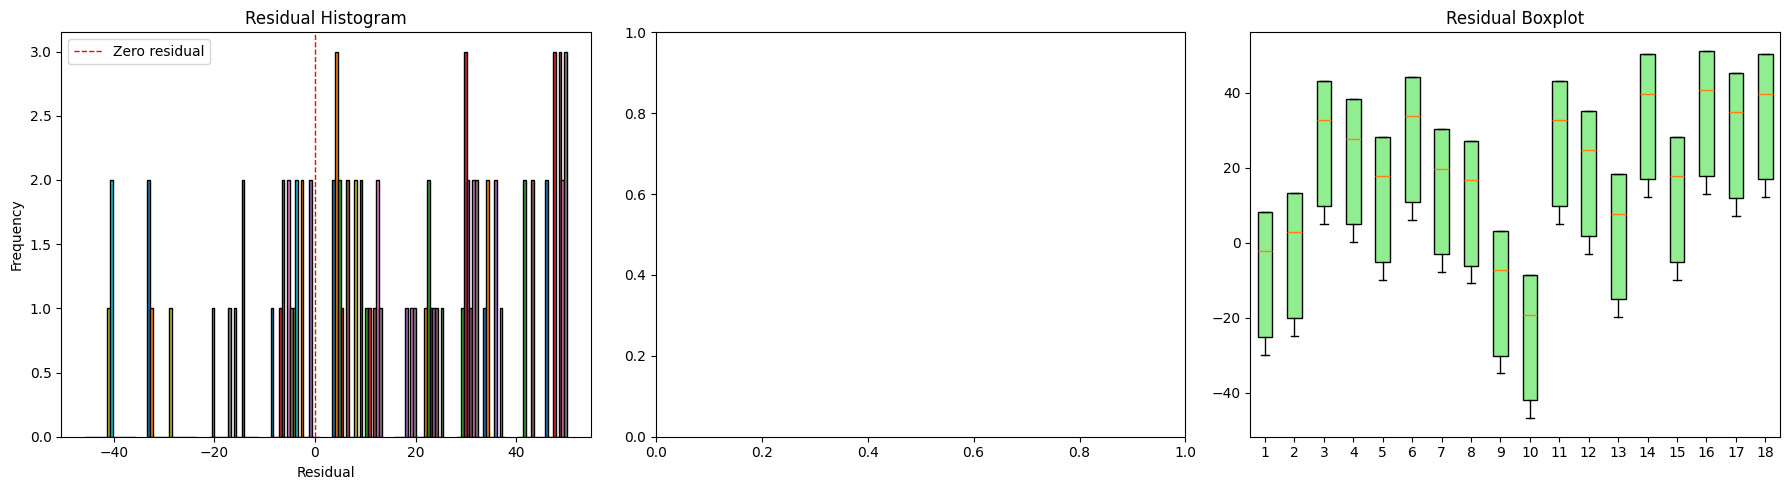

In [ ]:
# residual(error graph to check erro are small, large or outliers.)
# if  data near to zero it is perfect model.
#if error < 0  or  predicted value < actual value ( over estimate and large error)
#if error > 0  or predicted value > actual value( underestimate estimate and small error)

# Calculate residuals
residuals = y_train.values - y_predict.reshape(-1,1)

# Plot Histogram, Boxplot, Scatter Plot
fig, axs = plt.subplots(1, 3, figsize=(18,5))

# 1️⃣ Histogram
axs[0].hist(residuals, bins=8, edgecolor='black')
axs[0].axvline(0, color='red', linestyle='dashed', linewidth=1, label='Zero residual')
axs[0].set_title('Residual Histogram')
axs[0].set_xlabel('Residual')
axs[0].set_ylabel('Frequency')
axs[0].legend()

# 2️⃣ Scatter Plot
# axs[1].scatter(X_train['Weight'].values, residuals, s=100)
# axs[1].axhline(0, color='black', linestyle='dashed', linewidth=1)
# axs[1].set_title('Residual Scatter Plot')
# axs[1].set_xlabel('Weight')
# axs[1].set_ylabel('Residual')

# 3️⃣ Boxplot
axs[2].boxplot(residuals, vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
axs[2].set_title('Residual Boxplot')

plt.tight_layout()
plt.show()



#How do you detect outliers?
#Boxplot (1.5×IQR)
#Large residuals in scatter/histogram

In [14]:
y_train , y_predict

(16    140
 3     145
 12    175
 9     170
 4     160
 10    176
 5     162
 17    159
 1     135
 2     123
 7     175
 19    167
 18    150
 11    182
 22    160
 13    183
 15    177
 8     182
 Name: Height, dtype: int64,
 array([131.718363  , 131.718363  , 142.20495594, 165.08479508,
        169.85142823]))